(540, 2500) (540,)


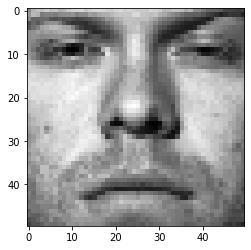

In [2]:
import numpy as np
from scipy import misc
import imageio
from matplotlib import pylab as plt
import matplotlib.cm as cm
import os
%matplotlib inline

train_labels, train_data = [], []
for line in open('./drive/MyDrive/faces/train.txt'): #'./faces/train.txt'
  im = imageio.imread(line.strip().split()[0])
  train_data.append(im.reshape(2500, ))
  train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.show()

(100, 2500) (100,)


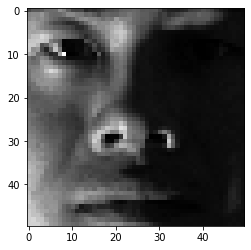

In [3]:
test_labels, test_data = [], []
for line in open('./drive/MyDrive/faces/test.txt'):
  im = imageio.imread(line.strip().split()[0])
  test_data.append(im.reshape(2500, ))
  test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.show()

#1. (c)

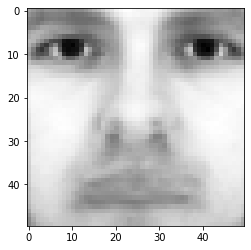

In [4]:
avg_face = np.zeros((train_data.shape[1], ))

for i in range(train_data.shape[1]):
  avg_face[i] = np.mean(train_data[:, i])

plt.imshow(avg_face.reshape(50, 50), cmap=cm.Greys_r)

#1. (d)

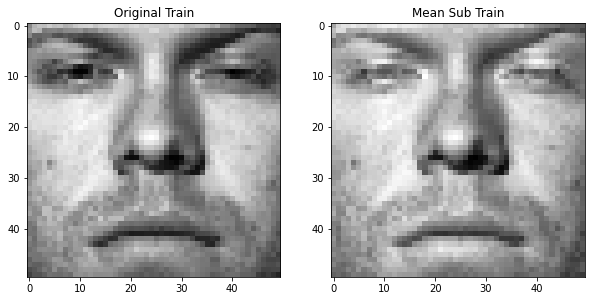

In [5]:
Mean_train = train_data - avg_face

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Train')
plt.imshow(train_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.subplot(1, 2, 2)
plt.title('Mean Sub Train')
plt.imshow(Mean_train[10, :].reshape(50, 50), cmap=cm.Greys_r)

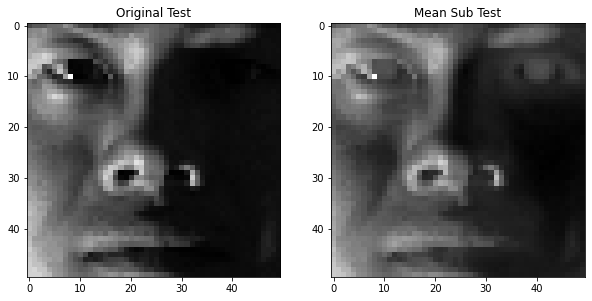

In [6]:
Mean_test = test_data - avg_face

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Test')
plt.imshow(test_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.subplot(1, 2, 2)
plt.title('Mean Sub Test')
plt.imshow(Mean_test[10, :].reshape(50, 50), cmap=cm.Greys_r)

#1. (e)

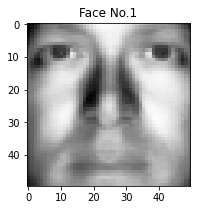

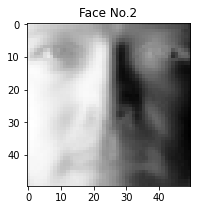

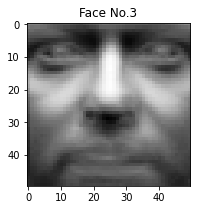

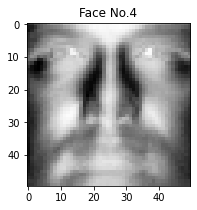

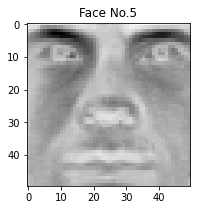

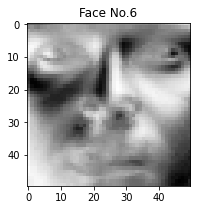

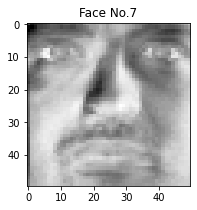

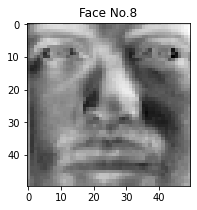

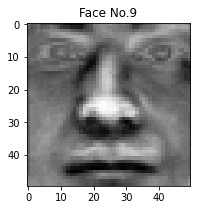

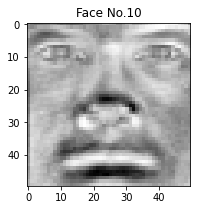

In [7]:
U, s, V = np.linalg.svd(Mean_train)#train_data
for i in range(10):
  plt.figure(figsize=(3,3))
  plt.title("Face No.{}".format(i+1))
  plt.imshow(V[i].reshape(50, 50), cmap=cm.Greys_r)
  plt.show()

#1. (f)

In [8]:
s = np.diag(s)

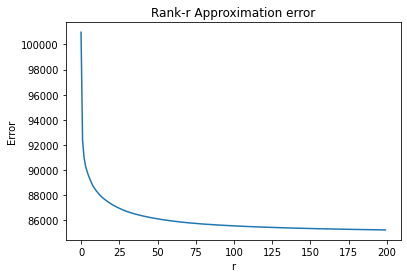

In [9]:
error_list = []
for r in range(200):
  Xr = np.matmul(np.matmul(U[:, :r+1], s[:r+1, :r+1]), V[:r+1, :])
  error = np.linalg.norm(train_data - Xr)
  error_list.append(error)

plt.title("Rank-r Approximation error")
plt.ylabel('Error')
plt.xlabel('r')
plt.plot(error_list)

#1. (g)

In [10]:
def Eigenface_Feature_train(r):
  f = V[:r, :]
  F = np.matmul(train_data, f.T)
  return F

def Eigenface_Feature_test(r):
  f = V[:r, :]
  F_test = np.matmul(test_data, f.T)
  return F_test

#1. (h)

In [11]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(multi_class='ovr')
acc = []

for r in range(200):
  F = Eigenface_Feature_train(r+1)
  F_test = Eigenface_Feature_test(r+1)

  LR.fit(F, train_labels)
  accuracy = LR.score(F_test, test_labels)
  acc.append(accuracy)

Highest Accuracy is: 94.0%


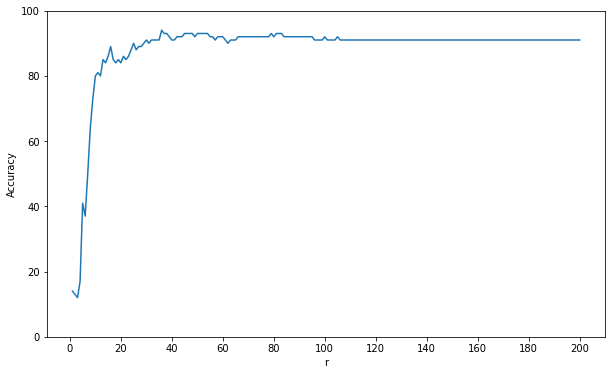

In [13]:
acc = np.array(acc)

print("Highest Accuracy is: {}%".format(acc.max()*100))

plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy')
plt.xlabel('r')
plt.xticks(range(0, 201, 20))
plt.ylim(0, 100)
plt.plot(range(1, 201), acc*100)